## Linear Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures # "Feature Engineering" for Polynomial Regression x --> x, x^2, x^3, x^4, ....
from sklearn.metrics import mean_squared_error

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

Assume that the (unknown) target function is

$y = f(x) = 1.0 + 0.5\times x$

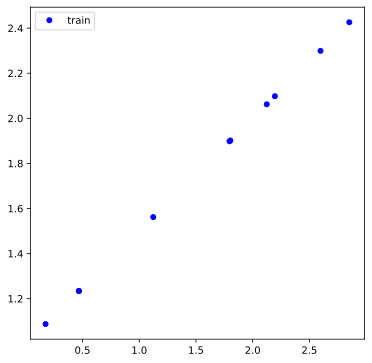

In [ ]:
# Create some training data item
np.random.seed(42)
N = 10
X_train = 3.0*np.random.rand(N, 1) # rand(N,1): Create N random numbers in the interval [0,1]
y_train = 1.0 + 0.5*X_train  # randn(N,1): Create N random numbers ~ standard normal distribution Gaussian(0,1)
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train, 'b.', markersize=10, label='train')
plt.legend()
plt.show()

The data items generated above don't have any noise, so they all lie on a straight line.

To simulate the fact that data collected in practice usually contain certain noises, we add some noises to the generated target values.

$y=f(x)=1.0+0.5\times x + \varepsilon$

In [ ]:
# Create some training data item
np.random.seed(42)
N = 10
X_train = 3.0*np.random.rand(N, 1) # rand(N,1): Create N random numbers in the interval [0,1]
y_train = 1.0 + 0.5*X_train + np.random.randn(N,1)/2.0  # randn(N,1): Create N random numbers ~ standard normal distribution Gaussian(0,1)

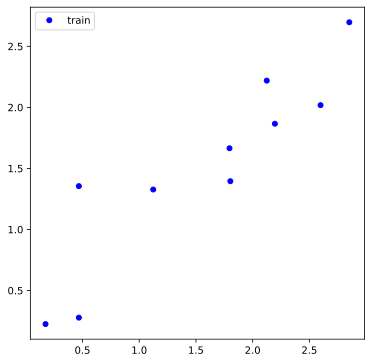

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train, 'b.', markersize=10, label='train')
#plt.plot(X_test, y_test, 'r*', markersize=10, label='test')
plt.legend()
plt.show()

In [ ]:
# Create some data to use for plotting
X_new = np.linspace(0,3,100).reshape(100,1) # Create an array of 100 equal-spaced numbers from 0->3

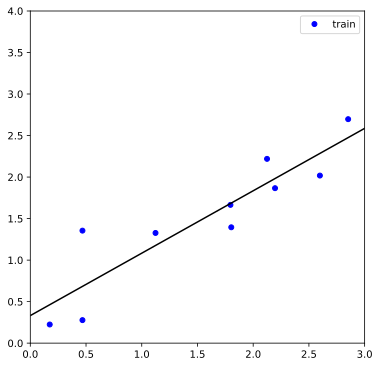

[0.33181066] [[0.75155622]]
Training Loss:  0.09991531905633781


In [ ]:
lin_reg = LinearRegression() # Normal Equation
lin_reg.fit(X_train,y_train)

plt.figure(figsize=(6,6))
plt.plot(X_train,y_train,'b.', ms=10, label='train')
plt.plot(X_new, lin_reg.predict(X_new), 'k-')
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()
print(lin_reg.intercept_, lin_reg.coef_)  # intercept_: w0 (sometimes we call it b) .coef_ : w1, w2, w3,....
# Here we only have a simple linear regression model: predict = w0 + w1*x

y_pred_train = lin_reg.predict(X_train) # Use the trained model to make predictions on the training dataset
lr_loss_train = mean_squared_error(y_train, y_pred_train) # Mean Squared Error Loss on training dataset
print('Training Loss: ', lr_loss_train)


In [ ]:
print(X_train)
print(y_train)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]]
[[1.32707299]
 [2.69735148]
 [1.86628207]
 [1.66512285]
 [1.3550091 ]
 [0.27735166]
 [0.2246665 ]
 [2.01812045]
 [1.39525696]
 [2.21923253]]


After training, we would like to evaluate the trained model on ''test'' data.

In [ ]:
# Create some test data
N_test = 10
X_test = 3.0*np.random.rand(N_test, 1)
y_test = 1.0 + 0.5*X_test + np.random.randn(N_test,1)/2.0 # Note: Testing dataset is generated in the same way as the train dataset

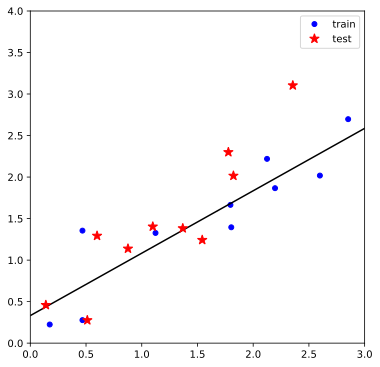

Training Loss:  0.09991531905633781
Testing Loss:  0.21020128681013045


In [ ]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10, label='train')
plt.plot(X_new, lin_reg.predict(X_new), 'k-')
plt.plot(X_test, y_test, 'r*', ms=10, label='test')
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()

y_pred_train = lin_reg.predict(X_train) # Use the trained model to make predictions on the training dataset
lr_loss_train = mean_squared_error(y_train, y_pred_train) # Mean Squared Error loss on the training dataset
print('Training Loss: ', lr_loss_train)

y_pred_test = lin_reg.predict(X_test) # Use the trained model to make predictions on the test dataset
lr_loss_test = mean_squared_error(y_test, y_pred_test) # Mean Squared Error loss on the test dataset
print('Testing Loss: ', lr_loss_test)

## Polynomial Regression

$\texttt{prediction} = w_0 + w_1x + w_2x^2 + w_3x^3 + \ldots + w_Dx^D$

[-0.0916451] [[ 2.35120734 -1.23811156  0.26177074]]


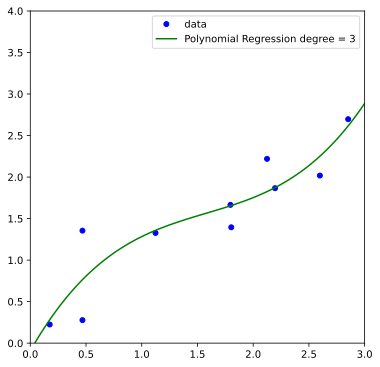

Training Loss:  0.08750190066671261


In [ ]:
deg = 3
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x --> x, x^2, x^3
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3

poly_reg = LinearRegression()  # In essence, Polynomial Regression is still Linear Regression, but we use polynomial features x, x^2, x^3, ....
poly_reg.fit(X_poly,y_train)

plt.figure(figsize=(6,6))
plt.plot(X_train, y_train, 'b.', ms=10, label='data')
# plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
# print(lin_reg.intercept_, lin_reg.coef_)

plt.plot(X_new, poly_reg.predict(X_new_poly), 'g', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_)
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()
poly_loss = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', poly_loss)

[-0.0916451] [[ 2.35120734 -1.23811156  0.26177074]]


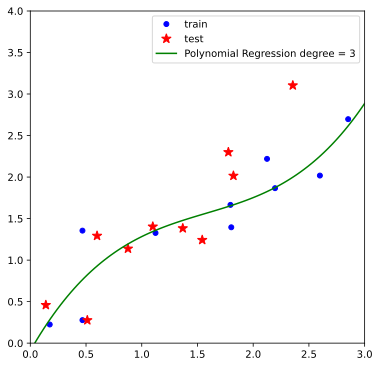

Training Loss:  0.08750190066671261
Testing Loss:  0.23747048298743456


In [ ]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10, label='train')
plt.plot(X_test,y_test,'r*', ms=10, label='test')
# plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
# print(lin_reg.intercept_, lin_reg.coef_)

plt.plot(X_new, poly_reg.predict(X_new_poly), 'g', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_)
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()

poly_loss_train = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', poly_loss_train)
X_test_poly = poly.fit_transform(X_test)
poly_loss_test = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
print('Testing Loss: ', poly_loss_test)

[38.06987101] [[ -399.60873893  1364.69579488 -2093.21939536  1665.82047801
   -716.24860925   158.03695712   -14.0390417 ]]


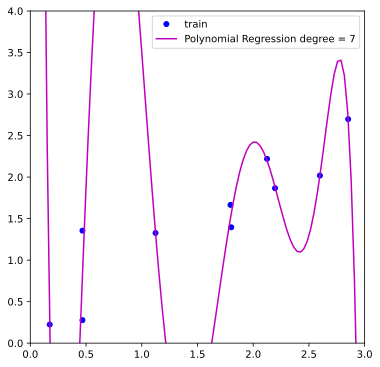

Training Loss:  0.06322418953671403


In [ ]:
deg = 7
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x --> x, x^2, x^3, ..., x^7
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3, ..., x^7

poly_reg = LinearRegression()  # In essence, Polynomial Regression is still Linear Regression, but we use polynomial features x, x^2, x^3, ....
poly_reg.fit(X_poly,y_train)

plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10, label='train')
# plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
# print(lin_reg.intercept_, lin_reg.coef_)

plt.plot(X_new, poly_reg.predict(X_new_poly), 'm', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_)
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()
poly_loss_train = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', poly_loss_train)

[38.06987101] [[ -399.60873893  1364.69579488 -2093.21939536  1665.82047801
   -716.24860925   158.03695712   -14.0390417 ]]


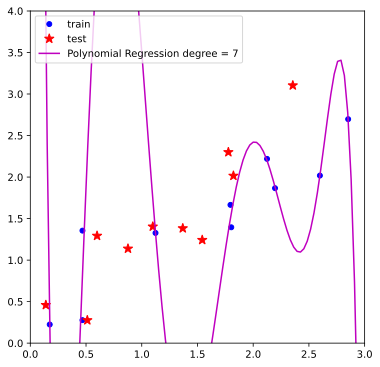

Training Loss:  0.06322418953671403
Testing Loss:  5.9575569104420065


In [ ]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10, label='train')
plt.plot(X_test,y_test,'r*', ms=10, label='test')
# plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
# print(lin_reg.intercept_, lin_reg.coef_)

plt.plot(X_new, poly_reg.predict(X_new_poly), 'm', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_)
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()

poly_loss_train = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', poly_loss_train)
X_test_poly = poly.fit_transform(X_test)
poly_loss_test = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
print('Testing Loss: ', poly_loss_test)

---Simple Linear Regression---
[0.33181066] [[0.75155622]]
Training Loss:  0.09991531905633781
Testing Loss:  0.21020128681013045

---Polynomial Regression degree = 3---
[-0.0916451] [[ 2.35120734 -1.23811156  0.26177074]]
Training Loss:  0.08750190066671261
Testing Loss:  0.23747048298743456

---Polynomial Regression degree = 7---
[38.06987101] [[ -399.60873893  1364.69579488 -2093.21939536  1665.82047801
   -716.24860925   158.03695712   -14.0390417 ]]
Training Loss:  0.06322418953671403
Testing Loss:  5.9575569104420065


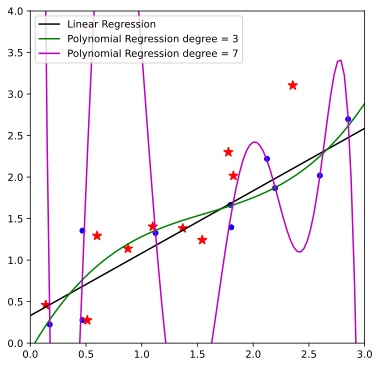

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10)
plt.plot(X_test, y_test,'r*', ms=10)
plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
print('---Simple Linear Regression---')
print(lin_reg.intercept_, lin_reg.coef_)
lr_loss_train = mean_squared_error(y_train, lin_reg.predict(X_train))
print('Training Loss: ', lr_loss_train)
lr_loss = mean_squared_error(y_test, lin_reg.predict(X_test))
print('Testing Loss: ', lr_loss)
print()

deg = 3
print(f'---Polynomial Regression degree = {deg}---')
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x --> x, x^2, x^3
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3

poly_reg = LinearRegression()  # In essence, Polynomial Regression is still Linear Regression, but we use polynomial features x, x^2, x^3, ....
poly_reg.fit(X_poly,y_train)
plt.plot(X_new, poly_reg.predict(X_new_poly), 'g', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_)
lr_loss_train = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', lr_loss_train)
X_test_poly = poly.fit_transform(X_test)
poly_3_loss = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
print('Testing Loss: ', poly_3_loss)
print()


deg = 7
print(f'---Polynomial Regression degree = {deg}---')
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x --> x, x^2, x^3, ..., x^7
X_new_poly = poly.fit_transform(X_new) # x --> x, x^2, x^3, ... x^7

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
plt.plot(X_new, poly_reg.predict(X_new_poly), 'm', label='Polynomial Regression degree = {}'.format(deg))
print(poly_reg.intercept_, poly_reg.coef_)
lr_loss_train = mean_squared_error(y_train, poly_reg.predict(X_poly))
print('Training Loss: ', lr_loss_train)
X_test_poly = poly.fit_transform(X_test)
poly_7_loss = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
print('Testing Loss: ', poly_7_loss)

plt.axis([0, 3, 0, 4])
plt.legend()
plt.show()

The 7-th degree polynomial regression model above (magenta color) is overfit to our training dataset.
If we use an overfit model on our future data, it will have a lot of errors.

The magnitude of parameters of an overfit model would be very big (very far from 0.0).

## Ridge Regression

Ridge Regression: Weight Decay

$\texttt{prediction} = w_0 + w_1x + w_2x^2 + \ldots + w_Dx^D$ (However $w_1, w_2,\ldots, w_D$ will have small values close to 0.0).

$w_{map} = \arg\min_{w} L(w) + \lambda\Vert w\Vert^2_2$


$\lambda\Vert w\Vert^2_2$: Regularziation term, and $\lambda$ is the regularization strength.

[0.33181066] [[0.75155622]]
[38.06839355] [ -399.5931998   1364.64294788 -2093.13814505  1665.75551427
  -716.22051288   158.03071754   -14.03848365]
[0.07987999] [-0.09370931  6.14945012 -4.77478402 -3.78021829  5.75140457 -2.28394658
  0.29814782]
[0.96643294] [ 0.00141423  0.00266913  0.00442294  0.00683627  0.00931761  0.00896911
 -0.00359498]
[1.50446301] [6.07278017e-10 1.77351966e-09 4.72471362e-09 1.25448975e-08
 3.35844395e-08 9.07463757e-08 2.47260904e-07]


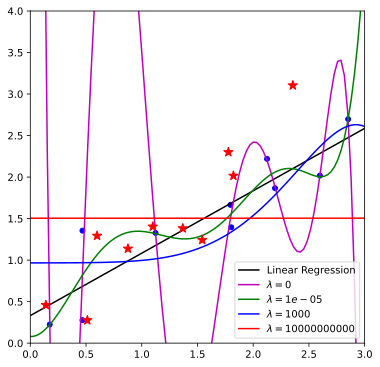

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(X_train, y_train,'b.', ms=10)
plt.axis([0, 3, 0, 4])

deg = 7
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly.fit_transform(X_train) # x ---> x, x^2, x^3, ..., x^7
X_new_poly = poly.fit_transform(X_new)

plt.plot(X_new, lin_reg.predict(X_new), 'k-', label='Linear Regression')
print(lin_reg.intercept_, lin_reg.coef_)

lambd = 0
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y_train)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'm-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 10**-5  # 10^{-5}
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y_train)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'g-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 1000
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y_train)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'b-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

lambd = 10000000000  # Choose it by our experience, trial and error
ridge_reg = Ridge(alpha=lambd)
ridge_reg.fit(X_poly, y_train)
plt.plot(X_new, ridge_reg.predict(X_new_poly), 'r-', label=r'$\lambda={}$'.format(lambd))
print(ridge_reg.intercept_, ridge_reg.coef_)

plt.plot(X_test, y_test,'r*', ms=10)
plt.legend()
plt.show()

In [ ]:
n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)
y_poly = y_train.squeeze()
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_poly, y_poly)
    coefs.append(ridge.coef_)

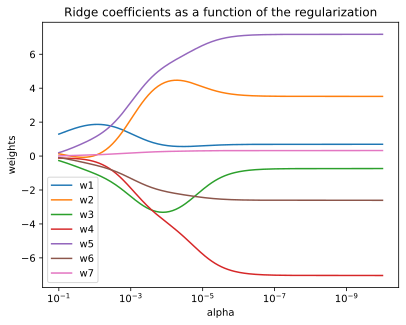

In [ ]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.gca().legend(list(map('w{}'.format, range(1,X_poly.shape[1]+1))))
plt.show()

## LASSO

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(X_poly, y_poly)
print(lasso.coef_)
print(lasso.intercept_)

[8.52853836e-01 0.00000000e+00 1.27935517e-03 4.65069396e-04
 0.00000000e+00 0.00000000e+00 5.98396960e-05]
0.0


Computing regularization path using the LARS ...
.

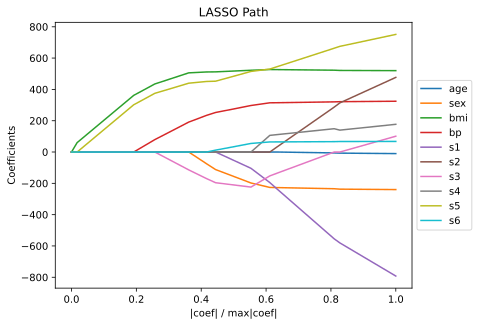

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(diabetes.feature_names, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()